In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('../../datasets/built_dataset.csv')
df.head(3)

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,sale_or_return,discount
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No
2,yunnan lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,sale,No


In [9]:
df['sale_or_return'].value_counts()

sale_or_return
sale      475174
return       254
Name: count, dtype: int64

In [10]:
filt_return = df['sale_or_return'] == 'sale'
df = df.loc[filt_return]

In [11]:
# Remove the unnecessary columns 
df = df.drop(columns=['unit_selling_price_rmb/kg','discount','item_code', 'sale_or_return'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475174 entries, 0 to 475427
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_name         475174 non-null  object 
 1   category_name     475174 non-null  object 
 2   date              475174 non-null  object 
 3   time              475174 non-null  object 
 4   quantity_sold_kg  475174 non-null  float64
dtypes: float64(1), object(4)
memory usage: 21.8+ MB


In [13]:
# Remove the minutes,seconds and milliseconds in time 
df['time'] = df['time'].apply(lambda x: x.split(':')[0])
df.head(3)

,item_name,category_name,date,time,quantity_sold_kg
0,green hot peppers,capsicum,2021-01-01,09,1.132
1,green hot peppers,capsicum,2021-01-01,09,0.593
2,yunnan lettuces,flower,2021-01-01,09,0.468


In [14]:
# 2021 sales
df['date'] = pd.to_datetime(df['date'])
df_2021 = df[df['date'].dt.year == 2021]
df_2021.head(3)

,item_name,category_name,date,time,quantity_sold_kg
0,green hot peppers,capsicum,2021-01-01,09,1.132
1,green hot peppers,capsicum,2021-01-01,09,0.593
2,yunnan lettuces,flower,2021-01-01,09,0.468


In [15]:
# 2022 sales
df['date'] = pd.to_datetime(df['date'])
df_2022 = df[df['date'].dt.year == 2022]
df_2022.head(5)

,item_name,category_name,date,time,quantity_sold_kg
262584,net lotus root,aquatic,2022-01-01,09,0.470
262585,wuhu green pepper,capsicum,2022-01-01,09,0.206
262586,caixin,flower,2022-01-01,09,0.302
262587,xixia mushroom,mushroom,2022-01-01,09,0.401
262588,shanghaiqing,flower,2022-01-01,09,0.484


{'whiskers': [<matplotlib.lines.Line2D at 0x1784cd370>,
 'caps': [<matplotlib.lines.Line2D at 0x1784cd8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1784cd0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1784cddf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1784e30d0>],
 'means': []}

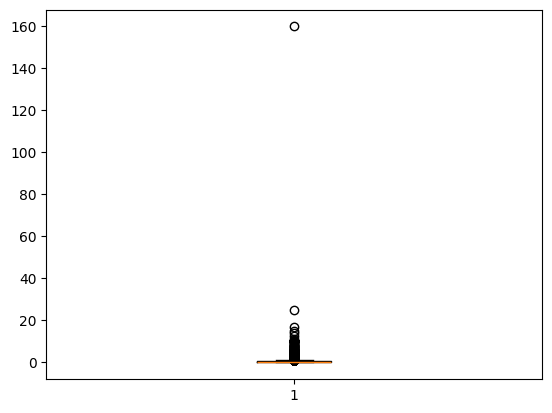

In [16]:
# plot the quantity sold (kilo)
import matplotlib.pyplot as plt
plt.boxplot(df['quantity_sold_kg'])

In [17]:
# Mean value of quantity sold (kilo)
import numpy as np
np.mean(df['quantity_sold_kg'])

0.50022226173991

In [18]:
# Handle outlier with the mean of quantity sold (kilo)
filt = df['quantity_sold_kg'] > 100
df['quantity_sold_kg'] = np.where( filt, np.mean(df[~filt]['quantity_sold_kg']), df['quantity_sold_kg'])

In [19]:
# Check the mean 
np.mean(df['quantity_sold_kg'])

0.4998865949875098

{'whiskers': [<matplotlib.lines.Line2D at 0x1785a97f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1785a9d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1785a9550>],
 'medians': [<matplotlib.lines.Line2D at 0x1785b82b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1785b8550>],
 'means': []}

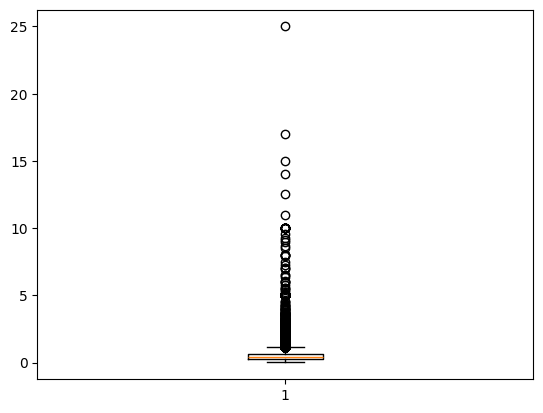

In [20]:
plt.boxplot(df['quantity_sold_kg'])

In [21]:
# Sum of the most sales of the day
df['date'] = pd.to_datetime(df['date'])
daily_sum = df.groupby(['item_name','category_name','date','time'])['quantity_sold_kg'].sum().reset_index()
daily_sum

,item_name,category_name,date,time,quantity_sold_kg
0,7 colour pepper,capsicum,2021-01-01,12,0.295
1,7 colour pepper,capsicum,2021-01-01,13,0.378
2,7 colour pepper,capsicum,2021-01-01,14,0.512
3,7 colour pepper,capsicum,2021-01-01,15,0.651
4,7 colour pepper,capsicum,2021-01-01,16,0.857
...,...,...,...,...,...
167422,zhuyecai,flower,2022-09-02,15,3.000
167423,zhuyecai,flower,2022-09-02,20,3.000
167424,zhuyecai,flower,2022-09-02,21,1.000
167425,zhuyecai,flower,2022-09-03,09,1.000


In [22]:
# Monthly sales Quantity Sold (kilo) in 2021
sales_data_2021 = df_2021.groupby(df_2021['date'].dt.month)['quantity_sold_kg'].sum().reset_index().rename(columns = {"date" : "Month"}).round(0).astype('int')
sales_data_2021

,Month,quantity_sold_kg
0,1,10226
1,2,13239
2,3,9746
3,4,8466
4,5,9174
5,6,8434
6,7,9439
7,8,11933
8,9,8901
9,10,8151


In [23]:
# Monthly sales Quantity Sold (kilo) in 2022
sales_data_2022 = df_2022.groupby(df_2022['date'].dt.month)['quantity_sold_kg'].sum().reset_index().rename(columns = {"date" : "Month"}).round(0).astype('int')
sales_data_2022

,Month,quantity_sold_kg
0,1,10478
1,2,7477
2,3,7210
3,4,6767
4,5,6350
5,6,6881
6,7,10580
7,8,18228
8,9,13234
9,10,16128


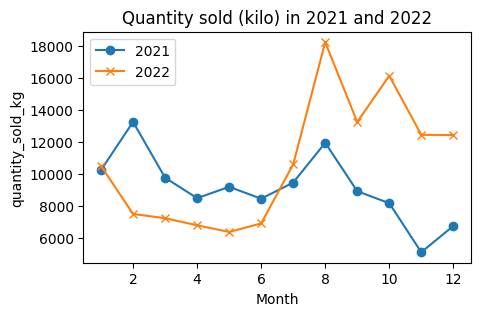

In [24]:
import matplotlib.pyplot as plt
# Plotting the scatter plot for 2021 and 2022 on the same plot
plt.figure(figsize=(5, 3))
plt.plot(sales_data_2021['Month'], sales_data_2021['quantity_sold_kg'], label='2021', marker='o')
plt.plot(sales_data_2022['Month'], sales_data_2022['quantity_sold_kg'], label='2022', marker='x')

plt.title('Quantity sold (kilo) in 2021 and 2022')
plt.xlabel('Month')
plt.ylabel('quantity_sold_kg')
plt.legend()
plt.show()

In [25]:
# within the one hour, max value of sold quantity sold (kilo) in 2021
highest_sales_in_day_2021 = df_2021.groupby(pd.to_datetime(df_2021['time'], format='%H').dt.hour)['quantity_sold_kg'].sum().reset_index().rename(columns={"time": "Hour"})
highest_sales_in_day_2021

,Hour,quantity_sold_kg
0,9,9911.542
1,10,16355.455
2,11,12742.698
3,12,6318.815
4,13,4527.111
5,14,5214.781
6,15,7933.986
7,16,10369.883
8,17,11338.755
9,18,10607.491


In [26]:
# within the one hour, max value of sold quantity sold (kilo) in 2022
highest_sales_in_day_2022 = df_2022.groupby(pd.to_datetime(df_2022['time'], format='%H').dt.hour)['quantity_sold_kg'].sum().reset_index().rename(columns={"time": "Hour"})
highest_sales_in_day_2022

,Hour,quantity_sold_kg
0,9,11568.536
1,10,17985.141
2,11,13738.811
3,12,7351.272
4,13,5181.259
5,14,6051.321
6,15,8877.755
7,16,11625.462
8,17,12676.197
9,18,11810.691


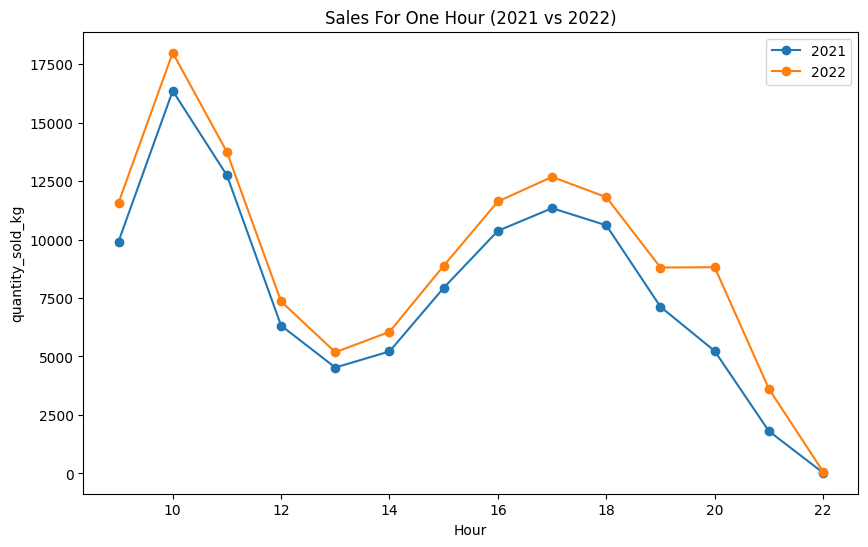

In [27]:
# Plot the different between 2021 and 2022 Quantity Sold (kilo) for hour
import matplotlib.pyplot as plt

# Plotting the difference
plt.figure(figsize=(10, 6))
plt.plot(highest_sales_in_day_2021['Hour'], highest_sales_in_day_2021['quantity_sold_kg'], label='2021', marker='o')
plt.plot(highest_sales_in_day_2022['Hour'], highest_sales_in_day_2022['quantity_sold_kg'], label='2022', marker='o')

plt.title('Sales For One Hour (2021 vs 2022)')
plt.xlabel('Hour')
plt.ylabel('quantity_sold_kg')
plt.legend()
plt.show()

In [28]:
df.head(10)

,item_name,category_name,date,time,quantity_sold_kg
0,green hot peppers,capsicum,2021-01-01,09,1.132
1,green hot peppers,capsicum,2021-01-01,09,0.593
2,yunnan lettuces,flower,2021-01-01,09,0.468
3,xixia mushroom,mushroom,2021-01-01,09,0.389
4,paopaojiao,capsicum,2021-01-01,09,0.606
5,red hang pepper,capsicum,2021-01-01,09,0.171
6,xixia mushroom,mushroom,2021-01-01,09,0.161
7,paopaojiao,capsicum,2021-01-01,09,0.350
8,paopaojiao,capsicum,2021-01-01,09,0.300
9,luosi pepper,capsicum,2021-01-01,09,0.411


In [29]:
df['time'] = df['time'].astype(int)

In [30]:
#Drop date column 
df = df.drop(columns='date')
df.to_csv('../../datasets/time_analysis_preprocess_dataset.csv', index=False)
df = pd.get_dummies(df)
df.shape

(475174, 185)

In [31]:
# save built dataset
df.to_csv('../../datasets/Time_analysis_preprocess_dataset_ont_hot.csv', index=False)